# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
from stock_prices_predictions.get_data import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras import layers
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import mean_absolute_percentage_error

# Fetch data

define company:

In [2]:
company = "T"
days_ahead = 1

In [3]:
X_train, X_test = get_lstm_data(company)

In [4]:
X_train.shape

(3773, 1)

In [5]:
X_test.shape

(919, 1)

# Scale data

In [6]:
#try differente scalers
scaler = RobustScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

X_test_sc = scaler.transform(X_test)

In [7]:
X_train_sc.shape

(3773, 1)

In [8]:
X_test_sc.shape

(919, 1)

# Create Sequences

In [9]:
#X_train, y_train = create_sequences(pd.DataFrame(X_train_sc),pd.DataFrame(X_train), days_ahead)
#X_test, y_test = create_sequences(pd.DataFrame(X_test_sc),pd.DataFrame(X_test), days_ahead)

In [10]:
#X_train, y_train = create_sequences_scaled(pd.DataFrame(X_train_sc), days_ahead)
#X_test, y_test = create_sequences_scaled(pd.DataFrame(X_test_sc), days_ahead)

In [11]:
X_train, y_train, y_train_simple = create_sequences_scaled_plus(pd.DataFrame(X_train_sc),pd.DataFrame(X_train), days_ahead)
X_test, y_test, y_test_simple = create_sequences_scaled_plus(pd.DataFrame(X_test_sc), pd.DataFrame(X_test), days_ahead)

In [12]:
X_train.shape

(919, 19, 1)

In [13]:
X_test.shape

(205, 19, 1)

In [14]:
y_train.shape

(919,)

In [15]:
y_test.shape

(205,)

In [16]:
len(y_test_simple)

205

In [17]:
#X_train

# Create model

In [18]:
model = Sequential()
#model.add(LSTM(units=72, activation='tanh', input_shape= (19, 1), return_sequences=True))
model.add(LSTM(units=18, activation='tanh', input_shape= (19, 1)))
#model.add(Dense(units=36, activation="tanh"))
#model.add(Dense(units=10, activation="tanh"))
model.add(Dense(units=1, activation="linear"))

# Fit model


In [19]:
es = EarlyStopping(patience=20, restore_best_weights=True)

#try different losses: mae, mape, mse

#rmsprop optimizer
model.compile(optimizer="nadam", loss="mse", metrics=["mae", "mape"])
#validation_split=0.2,
history_LSTM = model.fit(X_train, y_train, epochs=200, batch_size=16, workers=-1, validation_split=0.2, callbacks=[es])

Epoch 1/200
46/46 [==============================] - 3s 23ms/step - loss: 0.2640 - mae: 0.4276 - mape: 57666.6016 - val_loss: 1.2995 - val_mae: 1.0919 - val_mape: 110.8284
Epoch 2/200
46/46 [==============================] - 1s 12ms/step - loss: 0.0690 - mae: 0.2016 - mape: 186373.2031 - val_loss: 0.8270 - val_mae: 0.8526 - val_mape: 82.9869
Epoch 3/200
46/46 [==============================] - 1s 13ms/step - loss: 0.0169 - mae: 0.0866 - mape: 4964.3828 - val_loss: 0.5631 - val_mae: 0.6830 - val_mape: 63.0605
Epoch 4/200
46/46 [==============================] - 1s 13ms/step - loss: 0.0096 - mae: 0.0711 - mape: 104268.7891 - val_loss: 0.4336 - val_mae: 0.5908 - val_mape: 53.5339
Epoch 5/200
46/46 [==============================] - 1s 13ms/step - loss: 0.0073 - mae: 0.0628 - mape: 92204.4297 - val_loss: 0.3543 - val_mae: 0.5291 - val_mape: 47.5123
Epoch 6/200
46/46 [==============================] - 1s 13ms/step - loss: 0.0063 - mae: 0.0584 - mape: 75182.0547 - val_loss: 0.2997 - val_mae:

Epoch 49/200
46/46 [==============================] - 1s 13ms/step - loss: 0.0020 - mae: 0.0324 - mape: 19110.7754 - val_loss: 0.0088 - val_mae: 0.0756 - val_mape: 7.2081
Epoch 50/200
46/46 [==============================] - 1s 13ms/step - loss: 0.0020 - mae: 0.0325 - mape: 23278.2227 - val_loss: 0.0089 - val_mae: 0.0761 - val_mape: 7.2215
Epoch 51/200
46/46 [==============================] - 1s 13ms/step - loss: 0.0020 - mae: 0.0320 - mape: 28761.8887 - val_loss: 0.0076 - val_mae: 0.0693 - val_mape: 6.6203
Epoch 52/200
46/46 [==============================] - 1s 13ms/step - loss: 0.0019 - mae: 0.0321 - mape: 17594.9336 - val_loss: 0.0081 - val_mae: 0.0728 - val_mape: 6.9718
Epoch 53/200
46/46 [==============================] - 1s 13ms/step - loss: 0.0019 - mae: 0.0319 - mape: 23464.7637 - val_loss: 0.0088 - val_mae: 0.0767 - val_mape: 7.3965
Epoch 54/200
46/46 [==============================] - 1s 13ms/step - loss: 0.0019 - mae: 0.0316 - mape: 23445.7070 - val_loss: 0.0081 - val_mae: 

Epoch 97/200
46/46 [==============================] - 1s 16ms/step - loss: 0.0015 - mae: 0.0278 - mape: 21366.1230 - val_loss: 0.0055 - val_mae: 0.0610 - val_mape: 5.9123
Epoch 98/200
46/46 [==============================] - 1s 16ms/step - loss: 0.0015 - mae: 0.0277 - mape: 39128.0391 - val_loss: 0.0071 - val_mae: 0.0708 - val_mape: 6.8630
Epoch 99/200
46/46 [==============================] - 1s 15ms/step - loss: 0.0015 - mae: 0.0274 - mape: 29829.4141 - val_loss: 0.0059 - val_mae: 0.0633 - val_mape: 6.1283
Epoch 100/200
46/46 [==============================] - 1s 15ms/step - loss: 0.0015 - mae: 0.0275 - mape: 31272.1016 - val_loss: 0.0076 - val_mae: 0.0738 - val_mape: 7.1252
Epoch 101/200
46/46 [==============================] - 1s 15ms/step - loss: 0.0015 - mae: 0.0275 - mape: 31632.2070 - val_loss: 0.0054 - val_mae: 0.0595 - val_mape: 5.7295
Epoch 102/200
46/46 [==============================] - 1s 15ms/step - loss: 0.0015 - mae: 0.0274 - mape: 32188.7539 - val_loss: 0.0079 - val_ma

Epoch 145/200
46/46 [==============================] - 1s 15ms/step - loss: 0.0014 - mae: 0.0261 - mape: 17160.5176 - val_loss: 0.0046 - val_mae: 0.0559 - val_mape: 5.4304
Epoch 146/200
46/46 [==============================] - 1s 14ms/step - loss: 0.0014 - mae: 0.0260 - mape: 15145.6943 - val_loss: 0.0047 - val_mae: 0.0566 - val_mape: 5.5091
Epoch 147/200
46/46 [==============================] - 1s 15ms/step - loss: 0.0014 - mae: 0.0260 - mape: 15054.4541 - val_loss: 0.0043 - val_mae: 0.0537 - val_mape: 5.2335
Epoch 148/200
46/46 [==============================] - 1s 15ms/step - loss: 0.0014 - mae: 0.0257 - mape: 14270.1875 - val_loss: 0.0073 - val_mae: 0.0740 - val_mape: 7.2200
Epoch 149/200
46/46 [==============================] - 1s 15ms/step - loss: 0.0014 - mae: 0.0263 - mape: 2710.7913 - val_loss: 0.0051 - val_mae: 0.0600 - val_mape: 5.8426
Epoch 150/200
46/46 [==============================] - 1s 15ms/step - loss: 0.0014 - mae: 0.0261 - mape: 22605.5840 - val_loss: 0.0031 - val_

In [20]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.2207 - mae: 0.4034 - mape: 18.5533


[0.22067120671272278, 0.403436541557312, 18.553264617919922]

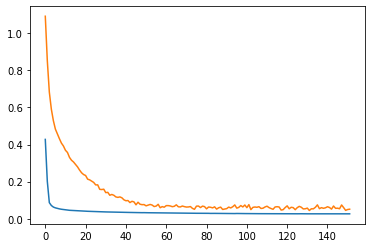

In [21]:
plt.plot(history_LSTM.history["mae"])
plt.plot(history_LSTM.history["val_mae"])

# Test Model

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 9)                 396       
_________________________________________________________________
dense (Dense)                (None, 1)                 10        
Total params: 406
Trainable params: 406
Non-trainable params: 0
_________________________________________________________________


In [23]:
prediction = model.predict(X_test)

In [24]:
prediction

array([[1.1486349],
       [1.236015 ],
       [1.2786595],
       [1.2761974],
       [1.2307552],
       [1.2624094],
       [1.2373307],
       [1.1445869],
       [1.1480763],
       [1.171561 ],
       [1.1357908],
       [1.1514355],
       [1.1620567],
       [1.1740463],
       [1.1637926],
       [1.2553107],
       [1.2953761],
       [1.2323856],
       [1.2499174],
       [1.2927812],
       [1.3128322],
       [1.2999829],
       [1.317225 ],
       [1.3216089],
       [1.3172866],
       [1.367907 ],
       [1.3887262],
       [1.3779707],
       [1.3477551],
       [1.3693253],
       [1.333324 ],
       [1.3225569],
       [1.3443886],
       [1.3204288],
       [1.3009409],
       [1.3206314],
       [1.1764293],
       [1.2379293],
       [1.2013075],
       [1.2044244],
       [1.2075909],
       [1.1691788],
       [1.1508265],
       [1.2245203],
       [1.264514 ],
       [1.2848868],
       [1.3033792],
       [1.290213 ],
       [1.3014641],
       [1.2810216],


# Visualizing Model

In [25]:
y_test_back = scaler.inverse_transform(y_test.reshape(-1, 1))
prediction_back = scaler.inverse_transform(prediction.reshape(-1, 1))

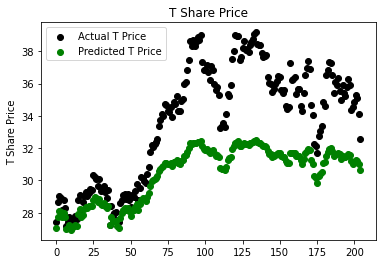

In [26]:
plt.scatter(range(len(y_test_back)), y_test_simple,  color="black", label=f"Actual {company} Price")
plt.scatter(range(len(y_test_back)),prediction_back, color="green", label=f"Predicted {company} Price")
plt.xlabel("")
plt.ylabel(f"{company} Share Price")
plt.title(f"{company} Share Price")
plt.legend()
plt.show()

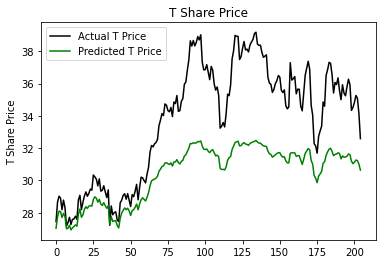

In [27]:
plt.plot(y_test_simple,  color="black", label=f"Actual {company} Price")
plt.plot(prediction_back, color="green", label=f"Predicted {company} Price")
plt.xlabel("")
plt.ylabel(f"{company} Share Price")
plt.title(f"{company} Share Price")
plt.legend()
plt.show()

In [28]:
mape = mean_absolute_percentage_error(y_test_back, prediction_back)
np.mean(mape)

9.182118

In [29]:
mape2 = mean_absolute_percentage_error(y_test_back, y_test_simple)
np.mean(mape2)

12.462072569098806